# SOMs in Python - Homework

__Métodos Intensivos de Computación Estadística__

Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.co

See my [Github Account](https://github.com/juanse1608) to know more about me and my projects.

In [42]:
import numpy as np
import scipy as sc
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import math
from minisom import MiniSom    


%config IPCompleter.greedy = True

In [3]:
#Let's plot the working directory
%cd ../../Datasets/

/Users/JuanSebastianCorredorRodriguez/Documents/Git Repositories/Jupyters-2019/Jupyters/Datasets


In [121]:
import warnings
warnings.filterwarnings("ignore")
dta = pd.read_csv('Fifa_19.csv')

In [122]:
#Select GKs and CMs only
dta = dta[dta.Position.isin(['GK','CM'])]
labels = dta['Position']

In [105]:
dta.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [106]:
dta = dta[['Crossing',
'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
'GKKicking', 'GKPositioning', 'GKReflexes']]

In [107]:
print(dta.head())

    Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
3       17.0       13.0             21.0          50.0     13.0       18.0   
9       13.0       11.0             15.0          29.0     13.0       12.0   
18      15.0       14.0             11.0          36.0     14.0       17.0   
19      14.0       14.0             13.0          33.0     12.0       13.0   
22      15.0       13.0             25.0          55.0     11.0       30.0   

    Curve  FKAccuracy  LongPassing  BallControl  ...  Penalties  Composure  \
3    21.0        19.0         51.0         42.0  ...       40.0       68.0   
9    13.0        14.0         26.0         16.0  ...       11.0       70.0   
18   18.0        12.0         42.0         18.0  ...       25.0       69.0   
19   19.0        20.0         35.0         23.0  ...       27.0       66.0   
22   14.0        11.0         59.0         48.0  ...       47.0       70.0   

    Marking  StandingTackle  SlidingTackle  GKDiving  GKHandli

In [70]:
#Let's implement the minisom with a SOM 6 times 6
som = MiniSom(10, 10, 34, sigma=0.5, learning_rate=0.5)
som.random_weights_init(np.array(dta))
print('Training...')
som.train_random(np.array(dta), 100)
print('Ready!')

Training...
Ready!


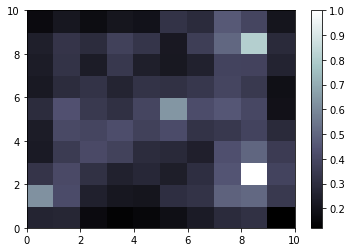

In [119]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
show() # show the figure

We can see that in the corners the colors are darker w.r.t the center of the square. This gives us an impression that one of the two selected positions is in the center and the other one in the corners, which I think it is a cool result. 